<a href="https://colab.research.google.com/github/Rajnishphe/PH421--Computational-Chemistry/blob/main/3_Solubility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Solubility prediction using QSAR**
In this tutorial, we will build a ML model for predicting the solubility of a series of compounds.

In [83]:
!pip install rdkit

In [84]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [85]:
#Download the file contaning trainig data.
url = "https://raw.githubusercontent.com/Rajnishphe/AIDD-2022/main/ML%20Based%20QSAR/delaney.csv"

Now we will use RDKIT to build a regresison based QSAR model to predict solubility of compounds.
Here we will make a QSAR model which can preict the solubility of given set of compounds using various descriptors like logp , molecular weight , rotatable bonds and aromatic proportion

In [86]:
#Downloading Input data to Build and train model
#First we will upload the input solubility data to build and train the model
#Reading the input data using pandas
import pandas as pd
sol = pd.read_csv(url)

In [87]:
#Take a look at the input data
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [88]:
#Take a look at only the smiles structure

sol.SMILES

,SMILES
0,ClCC(Cl)(Cl)Cl
1,CC(Cl)(Cl)Cl
2,ClC(Cl)C(Cl)Cl
3,ClCC(Cl)Cl
4,FC(F)(Cl)C(F)(Cl)Cl
...,...
1139,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


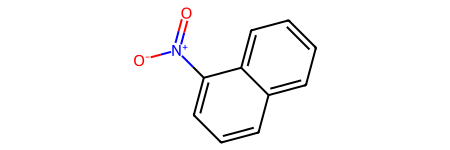

In [89]:
#Take a look at the first structure
from rdkit import Chem
Chem.MolFromSmiles(sol.SMILES[100])

In [90]:
#converting smiles to molecule list and Rdkit object list
from rdkit import Chem
mol_list= []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [91]:
#length of molecule list
len(mol_list)

1144

Extracting descriptors from structure, descriptors used are logp, molecular weight , number of rotatable bonds and aromatic proportion aromatic proportion calculated seperatley , others calculated using Rdkit

In [92]:
import numpy as np
from rdkit.Chem import Descriptors
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MolLogP","MolWt","NumRotatableBonds"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [93]:
#Make a datframe of the three descriptors
df = generate(sol.SMILES)
df

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [94]:
#we will see how to find aromatic atoms in molecule

SMILES = 'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21'
m = Chem.MolFromSmiles(SMILES)
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

Now we need to calculate aromatic proportion (aromatic atoms/heteroatom count). First we will calculate aromatic atoms in our input data molecules

In [95]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [96]:
AromaticAtoms(m)

19

In [97]:
#Aromatic atoms in each moelcule
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [98]:
#Heavy atom count in each molecule of the input data
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_HeavyAtomCount

[6,
 5,
 6,
 5,
 8,
 4,
 4,
 8,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 4,
 8,
 4,
 5,
 8,
 8,
 10,
 12,
 4,
 9,
 9,
 9,
 15,
 8,
 4,
 8,
 8,
 5,
 8,
 8,
 12,
 12,
 8,
 6,
 8,
 8,
 10,
 8,
 12,
 12,
 5,
 12,
 6,
 14,
 11,
 22,
 15,
 5,
 5,
 8,
 7,
 11,
 9,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 8,
 7,
 11,
 6,
 4,
 11,
 10,
 13,
 12,
 8,
 7,
 7,
 17,
 7,
 6,
 7,
 6,
 5,
 8,
 11,
 4,
 7,
 14,
 11,
 15,
 9,
 11,
 11,
 13,
 6,
 10,
 9,
 9,
 19,
 9,
 8,
 8,
 16,
 6,
 5,
 5,
 9,
 4,
 15,
 22,
 20,
 18,
 20,
 18,
 16,
 19,
 19,
 18,
 17,
 17,
 18,
 16,
 7,
 18,
 18,
 16,
 17,
 8,
 9,
 16,
 7,
 6,
 7,
 8,
 6,
 14,
 18,
 19,
 18,
 17,
 17,
 16,
 11,
 11,
 15,
 15,
 10,
 8,
 11,
 15,
 10,
 10,
 11,
 9,
 6,
 6,
 12,
 7,
 8,
 15,
 15,
 10,
 15,
 10,
 10,
 16,
 9,
 8,
 8,
 8,
 7,
 9,
 8,
 13,
 14,
 14,
 9,
 12,
 9,
 8,
 13,
 14,
 12,
 15,
 11,
 11,
 4,
 8,
 5,
 5,
 8,
 6,
 9,
 13,
 5,
 11,
 8,
 4,
 8,
 6,
 11,
 8,
 7,
 9,
 9,
 7,
 9,
 12,
 9,
 8,
 8,
 7,
 7,
 11,
 7,
 4,
 10,
 12,
 5,

In [99]:
#calculating aromatic proportion
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
desc_AromaticProportion

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [100]:
#Making a datafame of aromatic proportion

df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion,
                                              columns =['Aromatic Proportion'])

In [101]:
df_desc_AromaticProportion

,Aromatic Proportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


In [102]:
#combining all four descriptors into single data frame to form the X matrix
#X is the independent variable
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,Aromatic Proportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [103]:
sol.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [104]:
# Creating the Y matrix and Y is the dependent variable , ie solubility data
Y = sol.iloc[:,1]
Y

,measured log(solubility:mol/L)
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [105]:
# splitting the data set to training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2)

In [106]:
#creating a linear regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [107]:
# predicting the log solubility of training set from descriptors of training datset
Y_pred_train = model.predict(X_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.72882968 -0.0068106   0.01110229 -0.4524426 ]
Intercept: 0.26925943686514975
Mean squared error (MSE): 1.02
Coefficient of determination (R^2): 0.78


In [108]:
#predicting the log solubility of test dataset from descriptors of test dataset
Y_pred_test = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.72882968 -0.0068106   0.01110229 -0.4524426 ]
Intercept: 0.26925943686514975
Mean squared error (MSE): 0.97
Coefficient of determination (R^2): 0.73


In [109]:
#Finding the equation which describe the relationship between descriptors and log solubility
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]
print('LogS = ' +
      ' ' +
      yintercept +
      ' ' +
      LogP +
      ' ' +
      MW +
      ' ' +
      RB +
      ' ' +
      AP)


LogS =  0.27 -0.73 LogP -0.0068 MW 0.0111 RB -0.45 AP


In [110]:
Y_train.shape, Y_pred_train.shape

((915,), (915,))

In [111]:
Y_test.shape, Y_pred_test.shape

((229,), (229,))

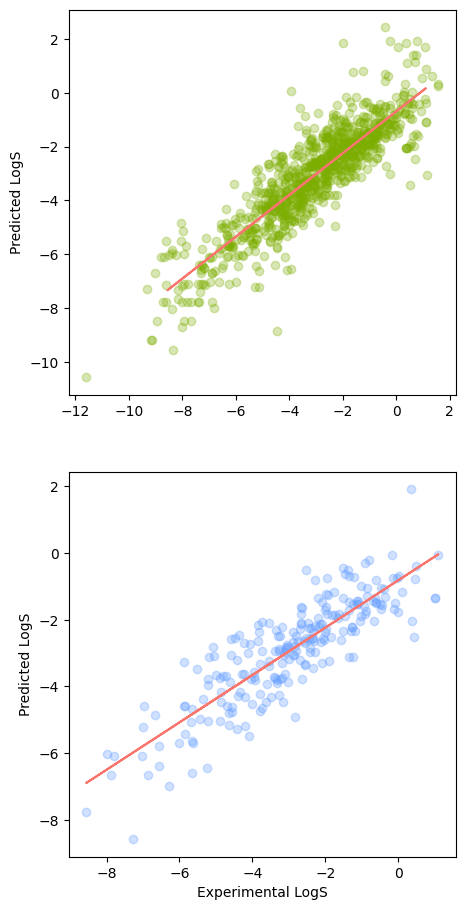

In [112]:
#ploting the predicted solubility and measured solubility
import matplotlib.pyplot as plt
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

In [113]:
#loading new set of data to predict solubility of unknwon molecules using the model we build
sol1 = pd.read_csv('https://raw.githubusercontent.com/Rajnishphe/AIDD-2022/main/ML%20Based%20QSAR/new_1.csv')

In [114]:
sol1


,Ambit_InchiKey,score,activity,SMILES
0,PFNFFQXMRSDOHW-UHFFFAOYNA-N,1,Active,N(CCCCNCCCN)CCCN
1,HOTSFPXUILMJMT-UHFFFAOYNA-N,1,Active,OC(CNC=1C=CC=CC1)COC
2,IEUAZNHOIZPQER-UHFFFAOYNA-N,1,Active,O1C2(NC(C1)(CO)CO)CCCC2
3,NZPYFPLXCCGDDX-UHFFFAOYNA-N,1,Active,ClC=1C(C=2C=CN=CC2)=CSC1N
4,XMYZXGRJFKLGLI-UHFFFAOYNA-N,1,Active,O=C(N1CC(CCC1)C)CCCC
5,CFRFHWQYWJMEJN-UHFFFAOYNA-N,1,Active,NC1=CC=C2C3=CC=CC=C3CC2=C1
6,DZBUGLKDJFMEHC-UHFFFAOYNA-N,1,Active,C=1C=CC=C2N=C3C=CC=CC3=CC21
7,DPELBGAJWVGUJS-QIQUEDJNNA-N,1,Active,S=C(NNC=1C=CC=CC1)NCC
8,FYLTVHCMIYGVPZ-UHFFFAOYNA-N,1,Active,O1C(C2CC(=O)CC(=O)C2)=CC=C1
9,GABNRVGIJFLKAW-UHFFFAOYNA-N,1,Active,S1C(C2CC(=O)CC(=O)C2)=CC=C1


In [115]:
sol1.SMILES

,SMILES
0,N(CCCCNCCCN)CCCN
1,OC(CNC=1C=CC=CC1)COC
2,O1C2(NC(C1)(CO)CO)CCCC2
3,ClC=1C(C=2C=CN=CC2)=CSC1N
4,O=C(N1CC(CCC1)C)CCCC
5,NC1=CC=C2C3=CC=CC=C3CC2=C1
6,C=1C=CC=C2N=C3C=CC=CC3=CC21
7,S=C(NNC=1C=CC=CC1)NCC
8,O1C(C2CC(=O)CC(=O)C2)=CC=C1
9,S1C(C2CC(=O)CC(=O)C2)=CC=C1


In [116]:
#converting into rdkit objects
from rdkit import Chem
mol_list1= []
for element in sol1.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list1.append(mol)

In [117]:
len(mol_list1)

53

In [118]:
#calculating the descriptors for new test dataset
df_1 = generate(sol1.SMILES)
df_1

,MolLogP,MolWt,NumRotatableBonds
0,-0.35660,202.346,11.0
1,1.10580,181.235,5.0
2,-0.40010,187.239,2.0
3,3.04570,210.689,1.0
4,2.43510,183.295,3.0
5,2.84000,181.238,0.0
6,3.38800,179.222,0.0
7,1.49750,195.291,3.0
8,1.68530,178.187,1.0
9,2.15380,194.255,1.0


In [119]:
#calculating aromatic proportion for new dataset
desc_AromaticAtoms_1 = [AromaticAtoms(element) for element in mol_list1]
desc_AromaticAtoms_1

[0,
 6,
 0,
 11,
 0,
 12,
 14,
 6,
 5,
 5,
 6,
 6,
 6,
 0,
 10,
 6,
 6,
 11,
 6,
 5,
 10,
 10,
 6,
 14,
 6,
 6,
 0,
 5,
 6,
 11,
 11,
 10,
 0,
 10,
 6,
 9,
 0,
 6,
 6,
 0,
 6,
 10,
 9,
 12,
 6,
 0,
 5,
 13,
 5,
 6,
 11,
 9,
 10]

In [120]:

desc_HeavyAtomCount_1 = [Descriptors.HeavyAtomCount(element) for element in mol_list1]
desc_HeavyAtomCount_1

[14,
 13,
 13,
 13,
 13,
 14,
 14,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 13,
 14,
 14,
 13,
 13,
 14,
 13,
 13,
 14,
 14,
 14,
 14,
 15,
 14,
 14,
 14,
 14,
 13,
 16,
 14,
 14,
 15,
 15,
 16,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 17,
 13,
 14,
 13,
 14,
 13,
 13,
 14]

In [121]:
desc_AromaticProportion_1 = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list1]
desc_AromaticProportion_1

[0.0,
 0.46153846153846156,
 0.0,
 0.8461538461538461,
 0.0,
 0.8571428571428571,
 1.0,
 0.46153846153846156,
 0.38461538461538464,
 0.38461538461538464,
 0.46153846153846156,
 0.42857142857142855,
 0.42857142857142855,
 0.0,
 0.7692307692307693,
 0.42857142857142855,
 0.42857142857142855,
 0.8461538461538461,
 0.46153846153846156,
 0.35714285714285715,
 0.7692307692307693,
 0.7692307692307693,
 0.42857142857142855,
 1.0,
 0.42857142857142855,
 0.42857142857142855,
 0.0,
 0.35714285714285715,
 0.42857142857142855,
 0.7857142857142857,
 0.7857142857142857,
 0.7692307692307693,
 0.0,
 0.7142857142857143,
 0.42857142857142855,
 0.6,
 0.0,
 0.375,
 0.46153846153846156,
 0.0,
 0.46153846153846156,
 0.7692307692307693,
 0.6923076923076923,
 0.8571428571428571,
 0.42857142857142855,
 0.0,
 0.38461538461538464,
 0.9285714285714286,
 0.38461538461538464,
 0.42857142857142855,
 0.8461538461538461,
 0.6923076923076923,
 0.7142857142857143]

In [122]:
df_desc_AromaticProportion1 = pd.DataFrame(desc_AromaticProportion_1,
                                              columns =['Aromatic Proportion'])

In [123]:
df_desc_AromaticProportion1

,Aromatic Proportion
0,0.000000
1,0.461538
2,0.000000
3,0.846154
4,0.000000
5,0.857143
6,1.000000
7,0.461538
8,0.384615
9,0.384615


In [124]:
#new X matrix for predicting the solubility using the model
X1 = pd.concat([df_1,df_desc_AromaticProportion1], axis=1)
X1

,MolLogP,MolWt,NumRotatableBonds,Aromatic Proportion
0,-0.35660,202.346,11.0,0.000000
1,1.10580,181.235,5.0,0.461538
2,-0.40010,187.239,2.0,0.000000
3,3.04570,210.689,1.0,0.846154
4,2.43510,183.295,3.0,0.000000
5,2.84000,181.238,0.0,0.857143
6,3.38800,179.222,0.0,1.000000
7,1.49750,195.291,3.0,0.461538
8,1.68530,178.187,1.0,0.384615
9,2.15380,194.255,1.0,0.384615


In [125]:
#predicting the log solubility of new dataset using the model
pred_x1 = model.predict(X1)

In [126]:
pred_x1

array([-0.72681332, -1.92430856, -0.69214204, -3.75719035, -2.72055662,
       -3.42276515, -3.87306829, -2.32772559, -2.33551253, -2.78640202,
       -2.09310959, -2.89477027, -1.24929826, -1.5728498 , -2.70463251,
       -2.54189539, -3.61389521, -2.82105561, -1.87256573, -3.11446644,
       -3.80251794, -2.30499472, -2.86669756, -3.43885522, -1.77546113,
       -4.68274619, -1.75096114, -2.06624399, -3.6130155 , -3.34717123,
       -2.52161085, -3.71197431, -4.34526786, -3.61120129, -2.20938564,
       -2.86778759, -1.36760149, -2.99880496, -2.57856299, -2.49819004,
       -2.78110819, -2.85729371, -2.88085027, -3.88018493, -3.81234892,
       -3.02157368, -1.84768936, -3.59629501, -0.6503692 , -3.14034778,
       -2.66370808, -2.31921609, -2.68521706])

In [127]:
#conevrt results into dataframe
df_predict_x1 = pd.DataFrame(pred_x1,columns =['predicted_solubility'])
df_predict_x1


,predicted_solubility
0,-0.726813
1,-1.924309
2,-0.692142
3,-3.757190
4,-2.720557
5,-3.422765
6,-3.873068
7,-2.327726
8,-2.335513
9,-2.786402


In [128]:
#save the results

df_predict_x1.to_csv('result_solubility.csv')